In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl
import matplotlib.dates as mdates

In [4]:
df = pd.read_csv('media_info.csv')
df = df[df['category'] != 'Media']
df = df[df['retweet'] != 'retweeted']
df['created_at'] = pd.to_datetime(df['created_at'], format = '%Y-%m-%d')
df = df.sort_values(by='created_at')

In [5]:
df_media = df.query('photo != 0 | video != 0')
df_no_media = df.query('photo == 0 & video == 0')

In [6]:
print('ORIGINAL DIPLOMAT TWEETS WITH IMAGES OR VIDEOS')
print('Number of tweets in this subset:')
print(len(df_media['retweet_count']))
print('Mean number of retweets:')
print(df_media['retweet_count'].sum()/len(df_media['retweet_count']))
print('Standard deviation:')
print(np.std(df_media['retweet_count']))

print('\nORIGINAL DIPLOMAT TWEETS WITHOUT IMAGES OR VIDEOS')
print('Number of tweets in this subset:')
print(len(df_no_media['retweet_count']))
print('Mean number of retweets:')
print(df_no_media['retweet_count'].sum()/len(df_no_media['retweet_count']))
print('Standard deviation:')
print(np.std(df_no_media['retweet_count']))

ORIGINAL DIPLOMAT TWEETS WITH IMAGES OR VIDEOS
Number of tweets in this subset:
53704
Mean number of retweets:
32.97676150752272
Standard deviation:
229.91463131293216

ORIGINAL DIPLOMAT TWEETS WITHOUT IMAGES OR VIDEOS
Number of tweets in this subset:
55717
Mean number of retweets:
16.97869590968645
Standard deviation:
145.98482711955322


In [7]:
mtpl.rcParams['font.family'] = 'serif'
mtpl.rcParams['figure.titlesize'] = 20
mtpl.rcParams['axes.labelsize'] = 14
mtpl.rcParams['xtick.labelsize'] = 10
mtpl.rcParams['ytick.labelsize'] = 10
mtpl.rcParams['legend.fontsize'] = 10
mtpl.rcParams['figure.dpi'] = 300

date_form = mdates.DateFormatter("%b-%Y")

palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

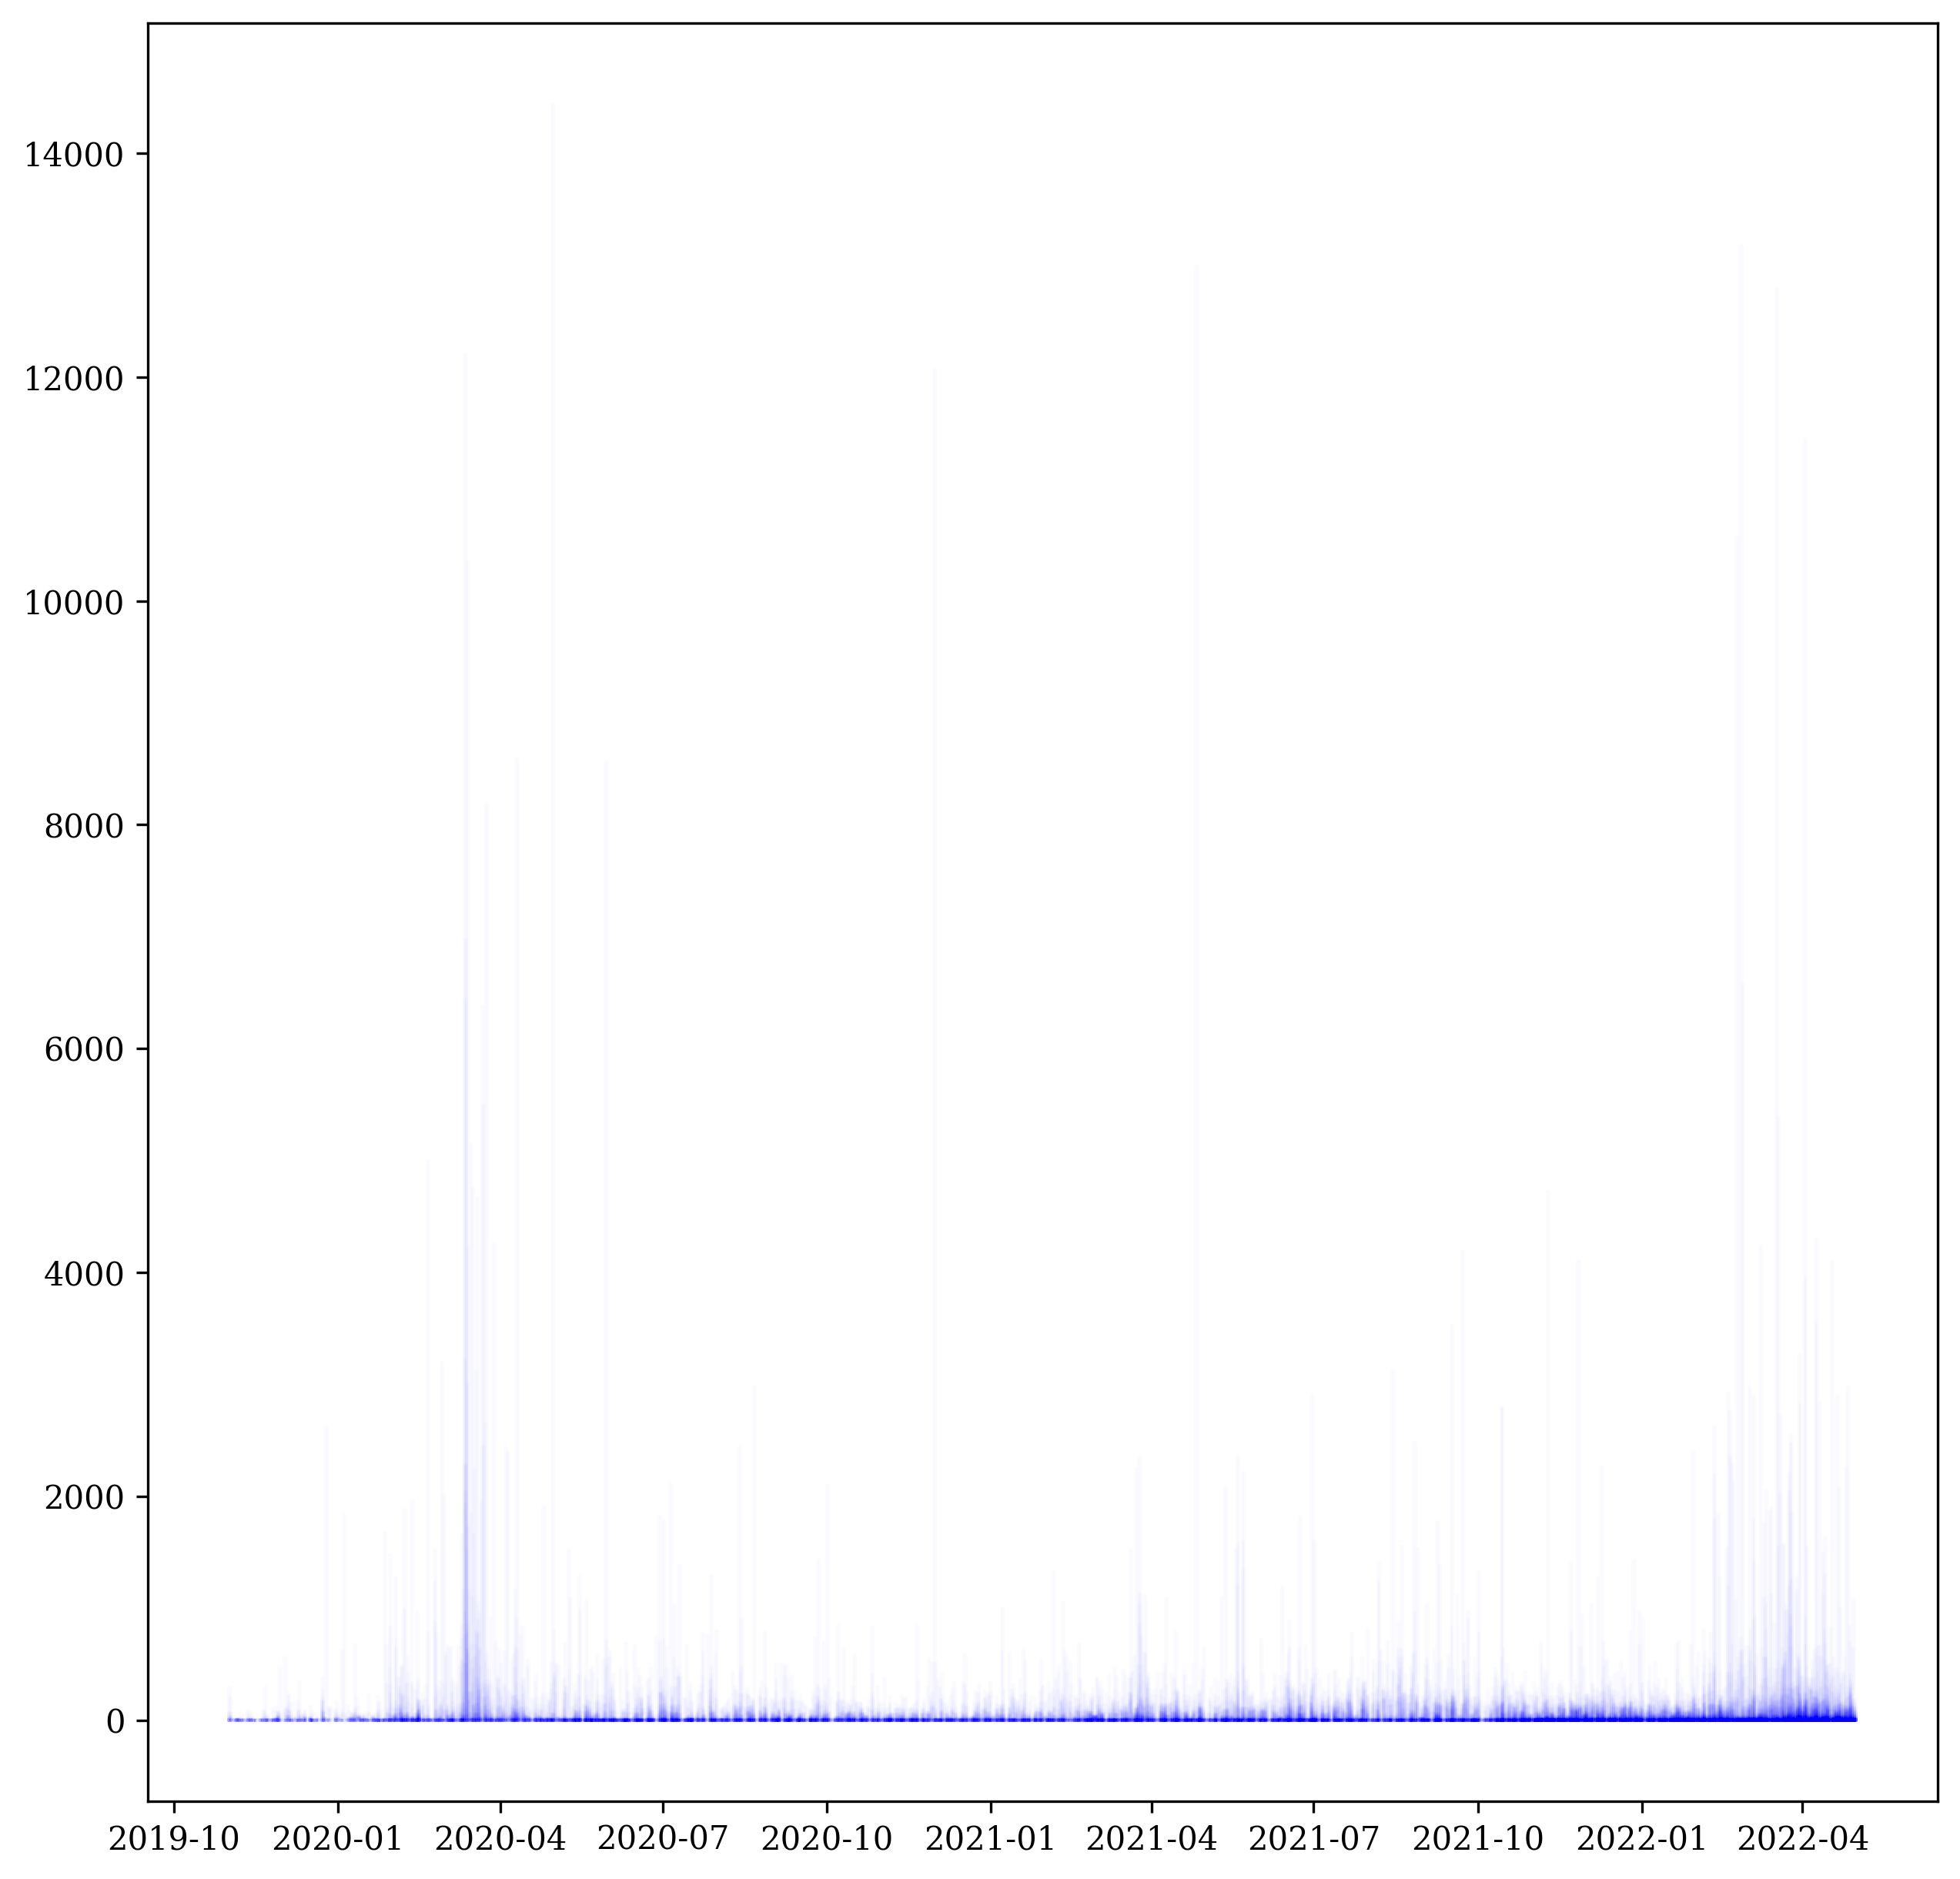

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i, row in df_media.iterrows():
    # fill between the date and the day after with day on the x-axis and retweet_count on the y-axis
    ax.fill_between([row['created_at'], row['created_at'] + pd.Timedelta(days=1)], [0, 0], [row['retweet_count'], row['retweet_count']], color='blue', alpha=0.01)

#ax.plot(df_media['created_at'], df_media['retweet_count'])